In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
# For tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import multiprocessing
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving Surveydata_train.csv to Surveydata_train (1).csv
Saving Traveldata_train.csv to Traveldata_train (1).csv
Saving Traveldata_test.csv to Traveldata_test (1).csv
Saving Surveydata_test.csv to Surveydata_test (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_train_1 = pd.read_csv('/content/drive/MyDrive/Traveldata_train.csv')
df_train_2 = pd.read_csv('/content/drive/MyDrive/Surveydata_train.csv')
df_test_1 = pd.read_csv('/content/drive/MyDrive/Traveldata_test.csv')
df_test_2 = pd.read_csv('/content/drive/MyDrive/Surveydata_test.csv')

In [ ]:
# reading the dataset files
#df_train_1 = pd.read_csv('Traveldata_train.csv')
#df_train_2 = pd.read_csv('Surveydata_train.csv')
#df_test_1 = pd.read_csv('Traveldata_test.csv')
#df_test_2 = pd.read_csv('Surveydata_test.csv')

In [ ]:
# Merging the 2 train dataset files  
df_train = pd.merge(df_train_1,df_train_2, on = ["ID"], how = "outer")

In [ ]:
# Merging the 2 test dataset files 
df_test = pd.merge(df_test_1,df_test_2, on = ["ID"], how = "outer")

In [ ]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_train.describe(include = object).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


In [ ]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
#checking for missing values
df_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [ ]:
#dropping the column ID as it unique for all customers , and not adding any value in predictions. 
df_train=df_train.drop(['ID'],axis=1)

In [ ]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
num_cols = ['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Overall_Experience']
cat_cols = ['Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

In [ ]:
#for col in cat_cols:
#df_train[cat_cols].fillna(' ', axis =  1, inplace = True)
# Fill categorical with ''
cat_fill = df_train.select_dtypes(include=['object']).columns.tolist()
df_train[cat_fill] = df_train[cat_fill].fillna('')

In [ ]:
#df_train['Arrival_Delay_in_Mins'].sort_values(ascending = False)
print(df_train['Arrival_Delay_in_Mins'] == 'NA')

0        False
1        False
2        False
3        False
4        False
         ...  
94374    False
94375    False
94376    False
94377    False
94378    False
Name: Arrival_Delay_in_Mins, Length: 94379, dtype: bool


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        94379 non-null  float64
 1   Travel_Distance                            94379 non-null  int64  
 2   Departure_Delay_in_Mins                    94379 non-null  float64
 3   Arrival_Delay_in_Mins                      94379 non-null  float64
 4   Overall_Experience                         94379 non-null  int64  
 5   Gender_Female                              94379 non-null  uint8  
 6   Gender_Male                                94379 non-null  uint8  
 7   Customer_Type_Disloyal Customer            94379 non-null  uint8  
 8   Customer_Type_Loyal Customer               94379 non-null  uint8  
 9   Type_Travel_Business Travel                94379 non-null  uint8  
 10  Type_Travel_Personal T

In [ ]:

#df_train['Age'].mean()
#mean_fill = ['Age']
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [ ]:
df_train['Departure_Delay_in_Mins'] = df_train['Departure_Delay_in_Mins'].fillna(df_train['Departure_Delay_in_Mins'].median())
df_train['Arrival_Delay_in_Mins'] = df_train['Arrival_Delay_in_Mins'].fillna(df_train['Departure_Delay_in_Mins'].median())

In [ ]:
#ADD THIS FOR TEST TOO*****************************
df_train['Arrival_Delay_in_Mins'] = df_train['Arrival_Delay_in_Mins'].replace([NA], 0)

In [ ]:
df_train.isnull().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

In [ ]:
df_train.head(10)

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,52.0,272,0.0,5.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,48.0,2200,9.0,0.0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,43.0,1061,77.0,119.0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,780,13.0,18.0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,50.0,1981,0.0,0.0,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
5,44.0,2810,0.0,0.0,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
6,56.0,2029,0.0,0.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,65.0,853,0.0,3.0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8,22.0,1636,1.0,0.0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9,57.0,306,0.0,0.0,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df_train.nunique()

Gender                        3
Customer_Type                 3
Age                          76
Type_Travel                   3
Travel_Class                  2
Travel_Distance            5210
Departure_Delay_in_Mins     437
Arrival_Delay_in_Mins       434
Overall_Experience            2
Seat_Comfort                  7
Seat_Class                    2
Arrival_Time_Convenient       7
Catering                      7
Platform_Location             7
Onboard_Wifi_Service          7
Onboard_Entertainment         7
Online_Support                7
Ease_of_Online_Booking        7
Onboard_Service               7
Legroom                       7
Baggage_Handling              6
CheckIn_Service               7
Cleanliness                   7
Online_Boarding               7
dtype: int64

In [ ]:
for col in cat_cols:
    print(df_train[col].value_counts(normalize=True))
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n\n")

Female    0.506628
Male      0.492557
          0.000816
Name: Gender, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Loyal Customer       0.739815
Disloyal Customer    0.165344
                     0.094841
Name: Customer_Type, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Business Travel    0.621081
Personal Travel    0.281164
                   0.097755
Name: Type_Travel, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Acceptable           0.224181
Needs Improvement    0.221935
Good                 0.218216
Poor                 0.160894
Excellent            0.137435
Extremely Poor       0.036692
                     0.000646
Name: Seat_Comfort, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Good                 0.207398
Excellent            0.187372
Acceptable         

In [ ]:
to_get_dummies_for = cat_cols

#creating dummy variables
df_train = pd.get_dummies(data = df_train, columns= to_get_dummies_for, drop_first=True)      



In [ ]:
df_train.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,52.0,272,0.0,5.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,48.0,2200,9.0,0.0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,43.0,1061,77.0,119.0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,44.0,780,13.0,18.0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,50.0,1981,0.0,0.0,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#Separating target variable and other variables
Y= df_train.Overall_Experience
X= df_train.drop(columns = ['Overall_Experience'])

In [ ]:
# NOT NEEDED HERE AS THERE IS SEPARATE TEST DATASET PROVIDED
##splitting the data
#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
X

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,52.0,272,0.0,5.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,48.0,2200,9.0,0.0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,43.0,1061,77.0,119.0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,44.0,780,13.0,18.0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,50.0,1981,0.0,0.0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,32.0,1357,83.0,125.0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
94375,44.0,592,5.0,11.0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
94376,63.0,2794,0.0,0.0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
94377,16.0,2744,0.0,0.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,0.832369,-1.660469,-0.383916,-0.259227,0.986832,-0.985222,-0.445082,0.593034,-1.280268,-0.625411,...,-0.007279,-0.775207,2.93677,-0.251939,-0.559079,-0.547105,-0.011277,-0.608992,-0.407688,2.730732
1,0.567712,0.215099,-0.147874,-0.389511,-1.013344,1.014999,-0.445082,0.593034,-1.280268,1.598950,...,-0.007279,1.289977,-0.34051,-0.251939,-0.559079,-0.547105,-0.011277,1.642058,-0.407688,-0.366202
2,0.236891,-0.892926,1.635557,2.711265,0.986832,-0.985222,-0.445082,0.593034,0.781086,-0.625411,...,-0.007279,-0.775207,-0.34051,-0.251939,-0.559079,1.827802,-0.011277,-0.608992,-0.407688,-0.366202
3,0.303056,-1.166284,-0.042966,0.079514,0.986832,-0.985222,-0.445082,0.593034,0.781086,-0.625411,...,-0.007279,-0.775207,-0.34051,-0.251939,1.788655,-0.547105,-0.011277,-0.608992,-0.407688,-0.366202
4,0.700041,0.002054,-0.383916,-0.389511,0.986832,-0.985222,-0.445082,0.593034,0.781086,-0.625411,...,-0.007279,1.289977,-0.34051,-0.251939,-0.559079,-0.547105,-0.011277,1.642058,-0.407688,-0.366202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,-0.490915,-0.604976,1.792918,2.867606,-1.013344,1.014999,-0.445082,0.593034,0.781086,-0.625411,...,-0.007279,1.289977,-0.34051,-0.251939,-0.559079,-0.547105,-0.011277,-0.608992,-0.407688,2.730732
94375,0.303056,-1.349171,-0.252782,-0.102885,-1.013344,1.014999,-0.445082,0.593034,0.781086,-0.625411,...,-0.007279,-0.775207,-0.34051,-0.251939,-0.559079,-0.547105,-0.011277,1.642058,-0.407688,-0.366202
94376,1.560176,0.792945,-0.383916,-0.389511,-1.013344,1.014999,-0.445082,-1.686244,0.781086,-0.625411,...,-0.007279,1.289977,-0.34051,-0.251939,1.788655,-0.547105,-0.011277,-0.608992,-0.407688,-0.366202
94377,-1.549543,0.744304,-0.383916,-0.389511,-1.013344,1.014999,-0.445082,0.593034,-1.280268,1.598950,...,-0.007279,-0.775207,-0.34051,-0.251939,-0.559079,-0.547105,-0.011277,1.642058,-0.407688,-0.366202


In [ ]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        94379 non-null  float64
 1   Travel_Distance                            94379 non-null  float64
 2   Departure_Delay_in_Mins                    94379 non-null  float64
 3   Arrival_Delay_in_Mins                      94379 non-null  float64
 4   Gender_Female                              94379 non-null  float64
 5   Gender_Male                                94379 non-null  float64
 6   Customer_Type_Disloyal Customer            94379 non-null  float64
 7   Customer_Type_Loyal Customer               94379 non-null  float64
 8   Type_Travel_Business Travel                94379 non-null  float64
 9   Type_Travel_Personal Travel                94379 non-null  float64
 10  Travel_Class_Eco      

In [ ]:
Y.value_counts(normalize= True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

class_weight={0: 0.54, 1: 0.45}

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Lets Try KNN Model

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#params_knn = {'n_neighbors': [3,5,7,9,11,13,15], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

#randomsearch_knn = RandomizedSearchCV(estimator = knn, param_distributions = params_knn, scoring = 'accuracy', cv = 5, n_jobs= -1, verbose = 2)

#model_knn = randomsearch_knn.fit(X_scaled,Y)

#knn_estimator = model_knn.best_estimator_

#print(knn_estimator)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')


In [ ]:
params_knn = {'n_neighbors': [3,5,7,9,11,13,15]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'accuracy', cv = 3)

model_knn = grid_knn.fit(X_scaled,Y)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=9)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, weights= 'distance' , p = 1 )

In [ ]:
knn.fit(X_scaled,Y)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



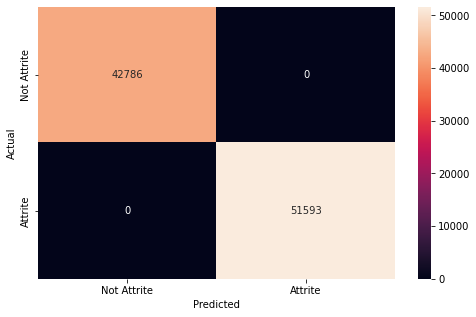

In [ ]:
Y_pred_knn = knn.predict(X_scaled)

metrics_score(Y, Y_pred_knn)

QDA Model

In [ ]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

In [ ]:
qda.fit(X_scaled, Y)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.84      0.43      0.57     42786
           1       0.66      0.93      0.77     51593

    accuracy                           0.70     94379
   macro avg       0.75      0.68      0.67     94379
weighted avg       0.74      0.70      0.68     94379



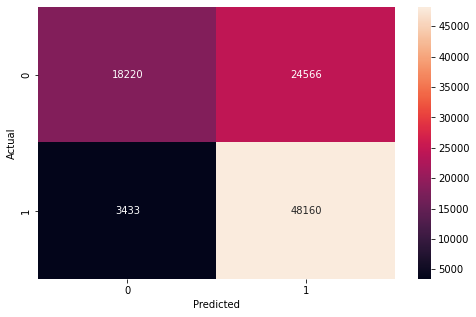

In [ ]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(X_scaled)

metrics_score(Y, y_pred_train_qda)

Try Logistic Regression

In [ ]:
#fitting logistic regression model
#lg=LogisticRegression(class_weight={0: 0.55, 1: 0.45})# Right way
lg=LogisticRegression(class_weight={0: 0.45, 1: 0.55})
lg.fit(X_scaled,Y)

LogisticRegression(class_weight={0: 0.45, 1: 0.55})

In [ ]:
lg.predict_proba(X_scaled)[:, 1]

array([0.02508909, 0.03493635, 0.9898249 , ..., 0.95269086, 0.15623357,
       0.04347684])

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     42786
           1       0.90      0.92      0.91     51593

    accuracy                           0.90     94379
   macro avg       0.90      0.90      0.90     94379
weighted avg       0.90      0.90      0.90     94379



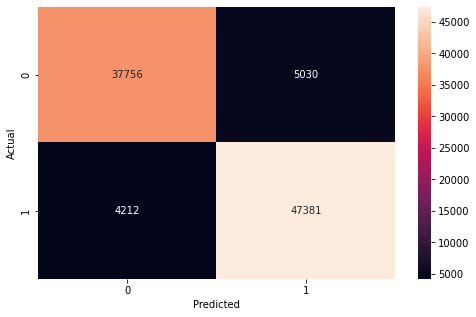

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_scaled)
metrics_score(Y, y_pred_train)

In [ ]:
#printing the coefficients of logistic regression
cols_1=X.columns

coef_lg=lg.coef_

output = pd.DataFrame(coef_lg,columns=cols_1).T.sort_values(by=0,ascending=False)

In [ ]:
output

,0
Seat_Comfort_Extremely Poor,2.162715
Seat_Comfort_Excellent,1.562404
Onboard_Entertainment_Excellent,0.753756
Gender_Female,0.425718
Baggage_Handling_Excellent,0.335764
...,...
Arrival_Time_Convenient_Excellent,-0.549785
Seat_Comfort_Needs Improvement,-0.563652
Ease_of_Online_Booking_Poor,-0.566639
Seat_Comfort_Acceptable,-0.582335


 **try**  **GauusianNB**

In [ ]:
clf = GaussianNB()
clf.fit(X_scaled, Y)

GaussianNB()

              precision    recall  f1-score   support

           0       0.98      0.04      0.09     42786
           1       0.56      1.00      0.72     51593

    accuracy                           0.57     94379
   macro avg       0.77      0.52      0.40     94379
weighted avg       0.75      0.57      0.43     94379



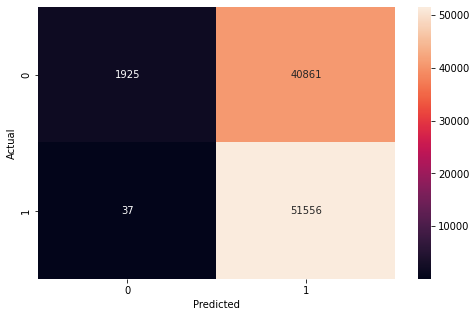

In [ ]:
# Checking model performance on the training data
y_pred_train_GNB = clf.predict(X_scaled)

metrics_score(Y, y_pred_train_GNB)

**TRY CATBOOST CLASSIFIER**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier with a learning rate of 0.1
CBC = CatBoostClassifier()

#Setting up the parameters

# parameters = {'depth'         : [4,5,6,7,8,9, 10], 'learning_rate' : [0.01,0.02,0.03,0.04, 0.05],  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]               }

parameters = {'depth'         : [11,12, 13, 14, 15], 'learning_rate' : [0.05, 0.06]  }

 



In [ ]:
#Making an object grid_GBC for GridSearchCV and fitting the dataset i.e X and y
#grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'accuracy', cv = 3)

Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs=-1)
Grid_CBC.fit(X_scaled,Y)

0:	learn: 0.6223677	total: 575ms	remaining: 9m 34s
1:	learn: 0.5533282	total: 921ms	remaining: 7m 39s
2:	learn: 0.4862700	total: 1.26s	remaining: 6m 57s
3:	learn: 0.4385096	total: 1.6s	remaining: 6m 39s
4:	learn: 0.4058727	total: 1.87s	remaining: 6m 11s
5:	learn: 0.3736239	total: 2.02s	remaining: 5m 34s
6:	learn: 0.3490684	total: 2.17s	remaining: 5m 8s
7:	learn: 0.3253456	total: 2.32s	remaining: 4m 48s
8:	learn: 0.3069266	total: 2.49s	remaining: 4m 34s
9:	learn: 0.2929845	total: 2.65s	remaining: 4m 22s
10:	learn: 0.2771902	total: 2.79s	remaining: 4m 11s
11:	learn: 0.2651266	total: 2.94s	remaining: 4m 1s
12:	learn: 0.2549035	total: 3.1s	remaining: 3m 55s
13:	learn: 0.2444665	total: 3.24s	remaining: 3m 48s
14:	learn: 0.2340769	total: 3.39s	remaining: 3m 42s
15:	learn: 0.2280900	total: 3.54s	remaining: 3m 37s
16:	learn: 0.2220101	total: 3.71s	remaining: 3m 34s
17:	learn: 0.2139705	total: 3.85s	remaining: 3m 30s
18:	learn: 0.2077542	total: 4s	remaining: 3m 26s
19:	learn: 0.2022593	total: 4

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fa2ef2b72b0>,
             n_jobs=-1,
             param_grid={'depth': [11, 12, 13, 14, 15],
                         'learning_rate': [0.05, 0.06]},
             scoring='accuracy')

In [ ]:
#Now we are using print statements to print the results. It will give the values of hyperparameters as a result.

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9554244091037142

 The best parameters across ALL searched params:
 {'depth': 12, 'learning_rate': 0.05}


In [ ]:
# Fit the best estimated catboost classifier and fit it to the training dataset
CBC = CatBoostClassifier(class_weights={0: 0.55, 1: 0.45}, depth = 12 , learning_rate = 0.05, random_state = 42 )
CBC.fit(X_scaled, Y)



0:	learn: 0.6174804	total: 846ms	remaining: 14m 5s
1:	learn: 0.5526133	total: 1.5s	remaining: 12m 30s
2:	learn: 0.4858978	total: 1.88s	remaining: 10m 24s
3:	learn: 0.4421847	total: 2.25s	remaining: 9m 19s
4:	learn: 0.4053062	total: 2.58s	remaining: 8m 33s
5:	learn: 0.3751576	total: 2.88s	remaining: 7m 57s
6:	learn: 0.3515591	total: 3.21s	remaining: 7m 35s
7:	learn: 0.3306146	total: 3.49s	remaining: 7m 12s
8:	learn: 0.3126417	total: 3.83s	remaining: 7m 1s
9:	learn: 0.2910221	total: 4.14s	remaining: 6m 50s
10:	learn: 0.2792699	total: 4.45s	remaining: 6m 40s
11:	learn: 0.2648327	total: 4.77s	remaining: 6m 32s
12:	learn: 0.2532809	total: 5.15s	remaining: 6m 31s
13:	learn: 0.2424138	total: 5.5s	remaining: 6m 27s
14:	learn: 0.2336740	total: 5.78s	remaining: 6m 19s
15:	learn: 0.2263219	total: 6.21s	remaining: 6m 21s
16:	learn: 0.2171858	total: 6.56s	remaining: 6m 19s
17:	learn: 0.2105658	total: 6.84s	remaining: 6m 12s
18:	learn: 0.2039591	total: 7.24s	remaining: 6m 13s
19:	learn: 0.1996671	to

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



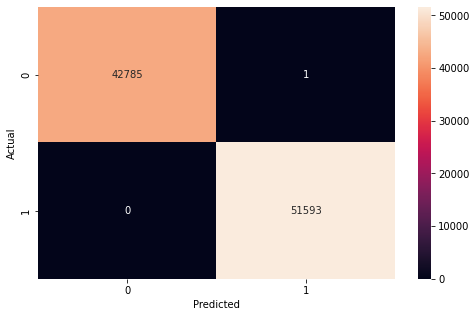

In [ ]:
# Predict and print the report and matrix
y_pred_train_CBC = CBC.predict(X_scaled)
metrics_score(Y, y_pred_train_CBC)

**Below is another catboost model that was tried before tuning catboost model.**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier with a learning rate of 0.1
clf = CatBoostClassifier(max_depth=9, learning_rate=0.05)

# Fit the classifier to the training data
clf.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42786
           1       1.00      0.99      0.99     51593

    accuracy                           0.99     94379
   macro avg       0.99      0.99      0.99     94379
weighted avg       0.99      0.99      0.99     94379



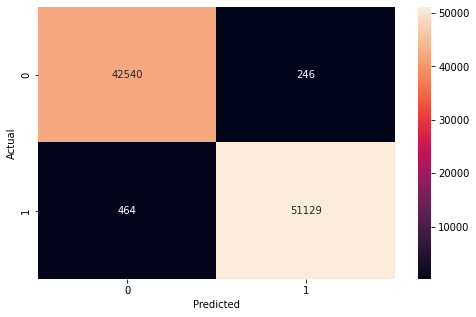

In [ ]:
# Checking model performance on the training data
y_pred_train = clf.predict(X_scaled)

metrics_score(Y, y_pred_train_clf)

Try Random Forest **Classifier** **bold text** bold text

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint

# Define the parameter distributions to search over
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the random forest model
rf = RandomForestClassifier()

# Set up the random search
n_iter_search = 20  # Number of parameter settings that are sampled
grid_rf = GridSearchCV(estimator = rf, param_grid=param_dist, scoring = 'accuracy', cv = 3, n_jobs=-1)


# Fit the random search to the data
grid_rf.fit(X_scaled, Y)

# Print the best set of hyperparameters
print(" Results from Grid Search for Random Forest Classifier " )
print("\n The best estimator across ALL searched params:\n",grid_rf.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rf.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rf.best_params_)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the final model with the best hyperparameters
rf_best = RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, n_estimators = 200 , max_features = None , max_depth = 20, min_samples_split = 10 ,  min_samples_leaf = 4,
                                  n_jobs = -1 )
rf_best.fit(X_scaled, Y)

RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=20,
                       max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42786
           1       0.99      0.97      0.98     51593

    accuracy                           0.98     94379
   macro avg       0.98      0.98      0.98     94379
weighted avg       0.98      0.98      0.98     94379



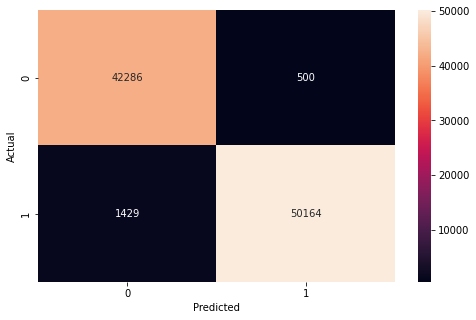

In [ ]:
# Check the Model Performance
y_pred_train_rf = rf_best.predict(X_scaled)
metrics_score(Y, y_pred_train_rf)

**LETS TRY SUPPORT VECTOR MACHINES (SVM)**

In [ ]:
from sklearn import svm
# Define the model
svms = svm.SVC(class_weight={0: 0.55, 1: 0.45})

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
# n_cpus = multiprocessing.cpu_count() 
grid_svms = GridSearchCV(estimator = svms, param_grid = param_grid, refit = True, scoring = 'accuracy', cv = 3, n_jobs= -1, verbose = 3)

# fitting the model for grid search
grid_svms.fit(X_scaled, Y)

# Print the best set of hyperparameters
print(" Results from Grid Search for SVM " )
print("\n The best estimator across ALL searched params:\n",grid_svms.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_svms.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_svms.best_params_)

# Set the classifier to the best combination of parameters
svms_tuned = grid_svms.best_estimator_
  
# fitting the model for grid search
svms_tuned.fit(X_scaled, Y)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


KeyboardInterrupt: ignored

In [ ]:
# Check the Model Performance
y_pred_train_svms = svms_tuned.predict(X_scaled, Y)
metrics_score(Y, y_pred_train_svms)

**LESTS TRY VOTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

labels = ['CatBoostClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']

clf1 = CatBoostClassifier(class_weights={0: 0.55, 1: 0.45}, depth = 12 , learning_rate = 0.05 )
clf2 = RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, n_estimators = 200 , max_features = None , max_depth = 20, min_samples_split = 10 ,  min_samples_leaf = 4)
clf3 = KNeighborsClassifier(n_neighbors = 9, weights= 'distance' , p = 1 )



In [ ]:
eclf1 = VotingClassifier(estimators=[ ('CBC', clf1), ('RF', clf2), ('KNN', clf3)], voting='hard')
eclf1 = eclf1.fit(X_scaled, Y)

0:	learn: 0.6000106	total: 172ms	remaining: 2m 51s
1:	learn: 0.5346482	total: 291ms	remaining: 2m 25s
2:	learn: 0.4802338	total: 428ms	remaining: 2m 22s
3:	learn: 0.4313662	total: 548ms	remaining: 2m 16s
4:	learn: 0.4007264	total: 661ms	remaining: 2m 11s
5:	learn: 0.3711371	total: 779ms	remaining: 2m 9s
6:	learn: 0.3453445	total: 900ms	remaining: 2m 7s
7:	learn: 0.3229156	total: 1.01s	remaining: 2m 5s
8:	learn: 0.3020996	total: 1.14s	remaining: 2m 5s
9:	learn: 0.2884139	total: 1.25s	remaining: 2m 3s
10:	learn: 0.2762977	total: 1.37s	remaining: 2m 2s
11:	learn: 0.2635935	total: 1.48s	remaining: 2m 1s
12:	learn: 0.2524484	total: 1.61s	remaining: 2m 2s
13:	learn: 0.2415810	total: 1.73s	remaining: 2m 1s
14:	learn: 0.2328409	total: 1.86s	remaining: 2m 2s
15:	learn: 0.2247687	total: 1.99s	remaining: 2m 2s
16:	learn: 0.2173213	total: 2.11s	remaining: 2m 1s
17:	learn: 0.2109013	total: 2.22s	remaining: 2m 1s
18:	learn: 0.2049056	total: 2.33s	remaining: 2m
19:	learn: 0.1987049	total: 2.46s	remai

In [ ]:
# Check the Model Performance
y_pred_train_vch = eclf1.predict(X_scaled)
print (y_pred_train_vch)
#metrics_score(Y, y_pred_train_vch)

[0 0 1 ... 1 0 0]


In [ ]:
Y

0        0
1        0
2        1
3        0
4        1
        ..
94374    0
94375    1
94376    1
94377    0
94378    0
Name: Overall_Experience, Length: 94379, dtype: int64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



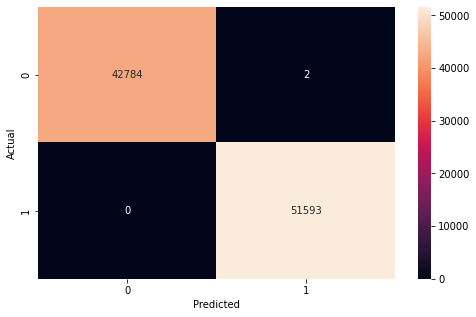

In [ ]:
metrics_score(Y, y_pred_train_vch)

0:	learn: 0.6000106	total: 133ms	remaining: 2m 12s
1:	learn: 0.5346482	total: 247ms	remaining: 2m 3s
2:	learn: 0.4802338	total: 383ms	remaining: 2m 7s
3:	learn: 0.4313662	total: 496ms	remaining: 2m 3s
4:	learn: 0.4007264	total: 610ms	remaining: 2m 1s
5:	learn: 0.3711371	total: 722ms	remaining: 1m 59s
6:	learn: 0.3453445	total: 842ms	remaining: 1m 59s
7:	learn: 0.3229156	total: 965ms	remaining: 1m 59s
8:	learn: 0.3020996	total: 1.08s	remaining: 1m 59s
9:	learn: 0.2884139	total: 1.21s	remaining: 1m 59s
10:	learn: 0.2762977	total: 1.34s	remaining: 2m
11:	learn: 0.2635935	total: 1.47s	remaining: 2m 1s
12:	learn: 0.2524484	total: 1.6s	remaining: 2m 1s
13:	learn: 0.2415810	total: 1.73s	remaining: 2m 1s
14:	learn: 0.2328409	total: 1.85s	remaining: 2m 1s
15:	learn: 0.2247687	total: 1.97s	remaining: 2m 1s
16:	learn: 0.2173213	total: 2.08s	remaining: 2m
17:	learn: 0.2109013	total: 2.21s	remaining: 2m
18:	learn: 0.2049056	total: 2.33s	remaining: 2m
19:	learn: 0.1987049	total: 2.46s	remaining: 2m


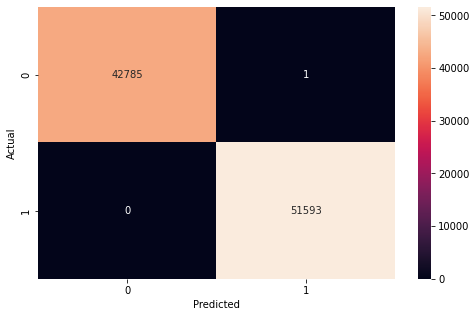

In [ ]:
eclf2 = VotingClassifier(estimators=[ ('CBC', clf1), ('RF', clf2), ('KNN', clf3)], voting='soft')
eclf2 = eclf2.fit(X_scaled, Y)
# Check the Model Performance
y_pred_train_vcs = eclf2.predict(X_scaled)
metrics_score(Y, y_pred_train_vcs)

**CLEAR SESSION**

In [ ]:
from keras import backend as K 

K.clear_session()

**Lets process the test data as done for train data before predicting. **

In [ ]:
df_submit_test = df_test.copy() # to be used for submission file
#dropping the column ID as it unique for all customers , and not adding any value in predictions. 
df_test = df_test.drop(['ID'],axis=1)

In [ ]:
cat_fill = df_test.select_dtypes(include=['object']).columns.tolist()
df_test[cat_fill] = df_test[cat_fill].fillna('')

In [ ]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Departure_Delay_in_Mins'] = df_test['Departure_Delay_in_Mins'].fillna(df_test['Departure_Delay_in_Mins'].median())
df_test['Arrival_Delay_in_Mins'] = df_test['Arrival_Delay_in_Mins'].fillna(df_test['Departure_Delay_in_Mins'].median())

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35602 non-null  object 
 1   Customer_Type            35602 non-null  object 
 2   Age                      35602 non-null  float64
 3   Type_Travel              35602 non-null  object 
 4   Travel_Class             35602 non-null  object 
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35602 non-null  float64
 7   Arrival_Delay_in_Mins    35602 non-null  float64
 8   Seat_Comfort             35602 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  35602 non-null  object 
 11  Catering                 35602 non-null  object 
 12  Platform_Location        35602 non-null  object 
 13  Onboard_Wifi_Service     35602 non-null  object 
 14  Onboard_Entertainment 

In [ ]:
#creating dummy variables for test
to_get_dummies_for = cat_cols
df_test = pd.get_dummies(data = df_test, columns= to_get_dummies_for, drop_first=True)

In [ ]:
#Scaling the data
sc=StandardScaler()
X_test_scaled=sc.fit_transform(df_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=df_test.columns)

CHECKING PERFORMANCE ON TEST DATA AND CREATING SUBMISSION FILE

In [ ]:
X_test_scaled


,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,-0.227750,-1.420638,-0.392499,-0.396519,0.985056,-0.983397,-0.444331,-1.687488,0.771733,-0.618071,...,1.611261,-0.777861,-0.335762,-0.252764,-0.552364,-0.549202,-0.007495,-0.611088,-0.410493,2.730297
1,-1.218830,-0.548819,-0.154918,0.331234,0.985056,-0.983397,2.250573,-1.687488,0.771733,-0.618071,...,1.611261,-0.777861,-0.335762,-0.252764,1.810399,-0.549202,-0.007495,-0.611088,-0.410493,-0.366260
2,1.357978,0.824810,-0.392499,-0.396519,-1.015170,1.016883,-0.444331,0.592597,0.771733,-0.618071,...,-0.620632,-0.777861,2.978297,-0.252764,-0.552364,1.820822,-0.007495,-0.611088,-0.410493,-0.366260
3,-0.690254,-0.620087,-0.392499,-0.396519,0.985056,-0.983397,-0.444331,0.592597,-1.295785,1.617938,...,1.611261,-0.777861,-0.335762,-0.252764,-0.552364,-0.549202,-0.007495,-0.611088,-0.410493,2.730297
4,-1.417046,-0.368206,0.056265,-0.396519,-1.015170,1.016883,2.250573,-1.687488,0.771733,-0.618071,...,1.611261,-0.777861,-0.335762,-0.252764,-0.552364,1.820822,-0.007495,-0.611088,-0.410493,-0.366260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,-2.077766,-0.637660,-0.392499,-0.396519,-1.015170,1.016883,-0.444331,0.592597,-1.295785,1.617938,...,-0.620632,1.285577,-0.335762,-0.252764,1.810399,-0.549202,-0.007495,-0.611088,-0.410493,-0.366260
35598,0.895474,-0.210049,-0.392499,-0.396519,0.985056,-0.983397,-0.444331,0.592597,0.771733,-0.618071,...,-0.620632,1.285577,-0.335762,-0.252764,-0.552364,-0.549202,-0.007495,1.636427,-0.410493,-0.366260
35599,-1.152758,-0.788008,-0.392499,-0.396519,-1.015170,1.016883,2.250573,-1.687488,0.771733,-0.618071,...,1.611261,-0.777861,-0.335762,-0.252764,-0.552364,-0.549202,-0.007495,-0.611088,2.436094,-0.366260
35600,1.820482,-1.529982,0.214652,0.019340,0.985056,-0.983397,-0.444331,0.592597,-1.295785,1.617938,...,1.611261,-0.777861,-0.335762,-0.252764,-0.552364,-0.549202,-0.007495,1.636427,-0.410493,-0.366260


In [ ]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Travel_Distance                            35602 non-null  float64
 2   Departure_Delay_in_Mins                    35602 non-null  float64
 3   Arrival_Delay_in_Mins                      35602 non-null  float64
 4   Gender_Female                              35602 non-null  float64
 5   Gender_Male                                35602 non-null  float64
 6   Customer_Type_Disloyal Customer            35602 non-null  float64
 7   Customer_Type_Loyal Customer               35602 non-null  float64
 8   Type_Travel_Business Travel                35602 non-null  float64
 9   Type_Travel_Personal Travel                35602 non-null  float64
 10  Travel_Class_Eco      

In [ ]:
X_test_scaled['CheckIn_Service_Extremely Poor'] = 0
X_test_scaled['Cleanliness_Extremely Poor'] = 0
X_test_scaled['Onboard_Service_Extremely Poor'] = 0
X_test_scaled['Online_Support_Extremely Poor'] = 0
X_test_scaled['Platform_Location_Very Inconvenient'] = 0
X_test_scaled = X_test_scaled[X.columns]

In [ ]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Travel_Distance                            35602 non-null  float64
 2   Departure_Delay_in_Mins                    35602 non-null  float64
 3   Arrival_Delay_in_Mins                      35602 non-null  float64
 4   Gender_Female                              35602 non-null  float64
 5   Gender_Male                                35602 non-null  float64
 6   Customer_Type_Disloyal Customer            35602 non-null  float64
 7   Customer_Type_Loyal Customer               35602 non-null  float64
 8   Type_Travel_Business Travel                35602 non-null  float64
 9   Type_Travel_Personal Travel                35602 non-null  float64
 10  Travel_Class_Eco      

In [ ]:
# Checking performance on the testing data
def generate_submission(model, out_file='submission.csv'):
    predictions = model.predict(X_test_scaled)
    predictions
    submission = pd.concat([df_submit_test, pd.DataFrame(predictions, columns=['Overall_Experience'])], axis=1)
    submission = submission[['ID', 'Overall_Experience']]
    submission.to_csv(out_file, index=False)

In [ ]:
generate_submission(eclf2, 'submission11.csv')